# <center>Analytics of ML Features Usage in IDEs</center>

In [15]:
%load_ext autoreload
%autoreload 2
from main_code import plot_generator as myplt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's start by analyzing the dependency of total number of request on the user license type:

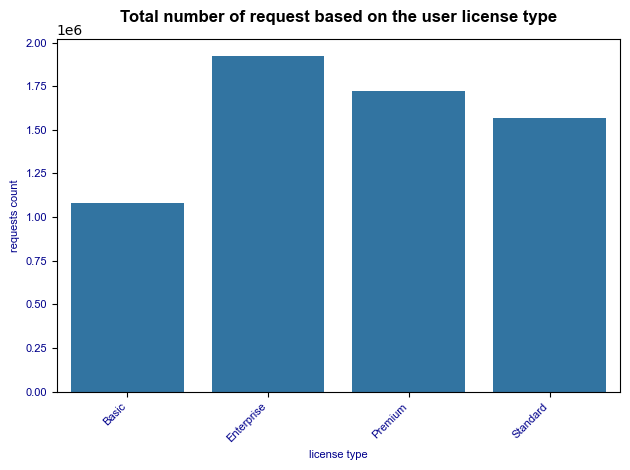

In [16]:
myplt.bar_plot("Total number of request based on the user license type", "license type", "requests count", "license", "requests_cnt", None, None, "sum")

It is also good to know how the license type affects the totaly credit usage:

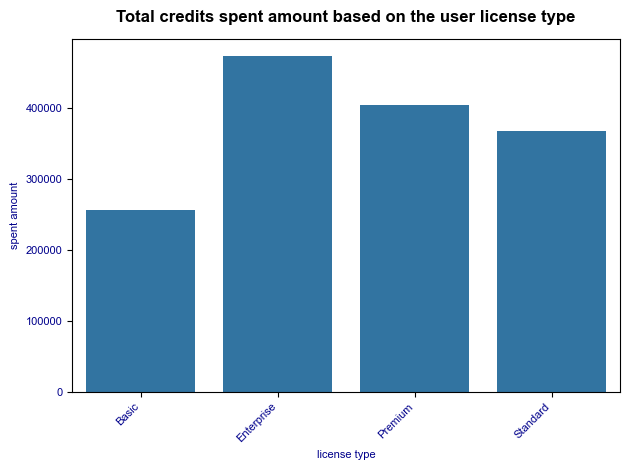

In [17]:
myplt.bar_plot("Total credits spent amount based on the user license type", "license type", "spent amount", "license", "spent_amount", None, None, "sum")

Quick Conclusions:

It is easy to see that users with a Basic license use the models the least. This may be due to several reasons:

- The offer for this type of license is too limited to be useful in simple projects.
- Users with this type of license are not aware of the features available to them.

Actionable Recommendations:
- Expand model offering for basic licenses.
- More in-IDE hints about available models and their features.

Now let's take a look at features popularity:

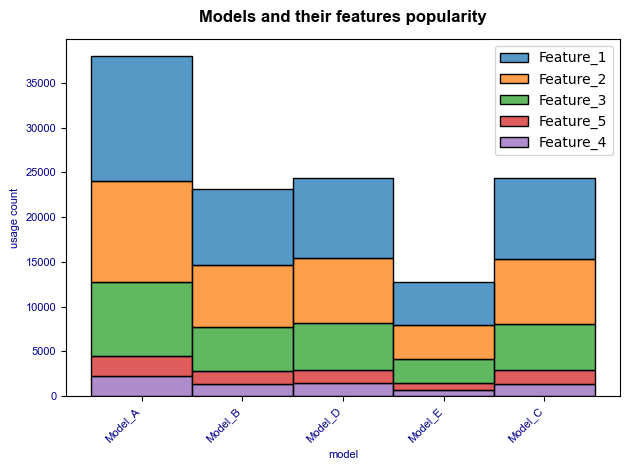

In [18]:
myplt.hist_plot("Models and their features popularity", "model", "usage count", "model", None, None, "feature", "feature")

Quick Conclusions:

- Model_A is the most frequently used model.
- Feature_1 and Feature_2 are the most commonly used features.
- Model_E, Feature_4 and Feature_5 show the lowest usage.

Actionable Recommendations:

- Promote top features to attract new users.
- Analyze why Model_E, Feature_4 and Feature_5 are underperforming and consider improving them or even deprecating them if they don't add value.

But before deprecating something, it would be good to check who is actually using it:

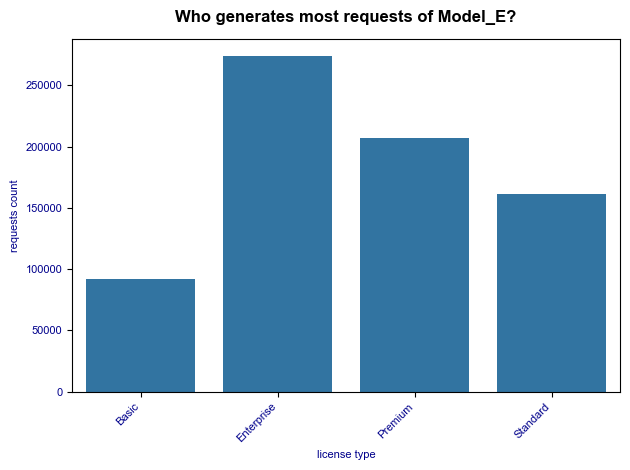

In [19]:
model_e = ["Model_E"]
myplt.bar_plot("Who generates most requests of Model_E?", "license type", "requests count", "license", "requests_cnt", model_e, "model", "sum")

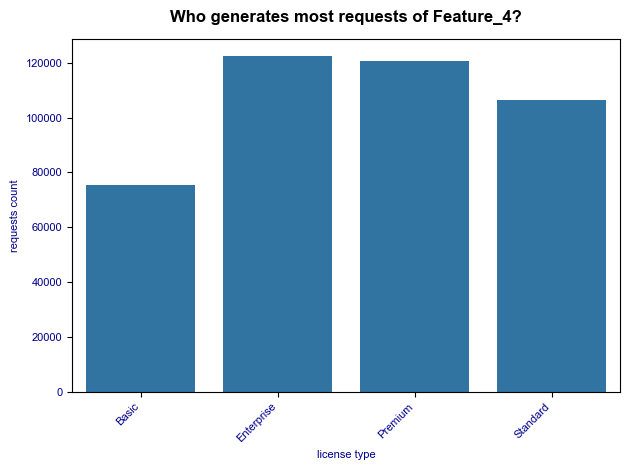

In [20]:
feature_4 = ["Feature_4"]
myplt.bar_plot("Who generates most requests of Feature_4?", "license type", "requests count", "license", "requests_cnt", feature_4, "feature", "sum")

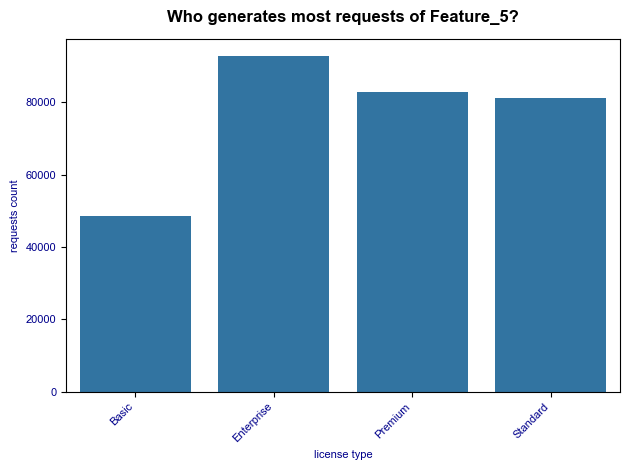

In [21]:
feature_5 = ["Feature_5"]
myplt.bar_plot("Who generates most requests of Feature_5?", "license type", "requests count", "license", "requests_cnt", feature_5, "feature", "sum")

Quick Conclusions:

As expected, Basic license users generate the fewest requests. However, the gap between Basic and other licenses is wider for Model E specifically. For Features 4 and 5, this usage gap narrows. Feature 5 has the lowest overall usage volume.

Actionable Recommendations:

- Improve Model_E: since it is heavily used by Enterprise license users (likely a key target audience).
- Consider deprecating Feature_5: due to its minimal usage overall, evaluate if it is worth maintaining.

Let's dive into analyzing how the models were used over time:

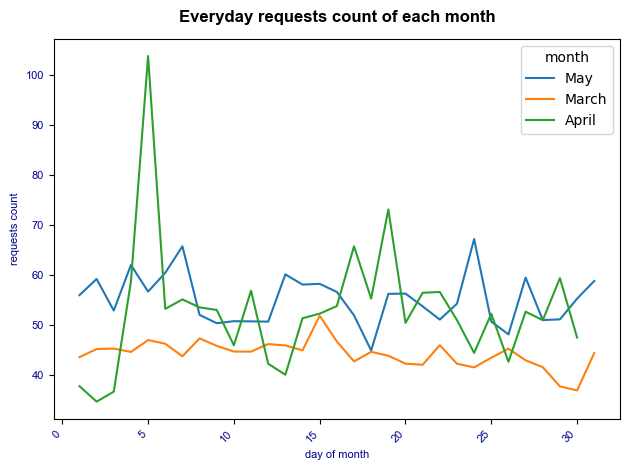

In [22]:
myplt.line_plot("Everyday requests count of each month", "day of month", "requests count", "day", "requests_cnt", None, None, "month", "month")

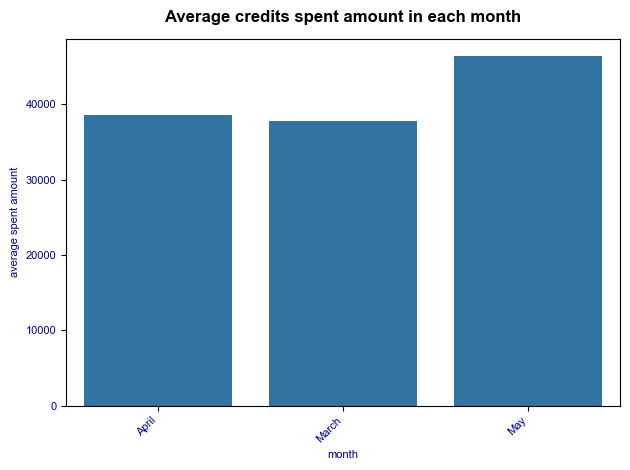

In [23]:
myplt.bar_plot("Average credits spent amount in each month", "month", "average spent amount", "month", "spent_amount", None, None, "avg")

Quick Conclusions:

It is easy to notice that the highest activity occurred at the beginning of April. Generally, the beginning of the month tends to be better than the end. Why is this the case?

- March is the end of first quarter, often characterized by exhausted budgets and paused projects.
- April is the start of second quarter brings new funding and the launch of new initiatives.
- If Easter occurred in March, the lower number of working days could have reduced business traffic, while April saw a rebound.

However, despite what is visible on the line chart, the average credits spent amount is clearly highest in May. What is interesting: March and April are quite similar.

Therefore, it should be verified whether requests count and credits spent amount are truly dependent on each other:

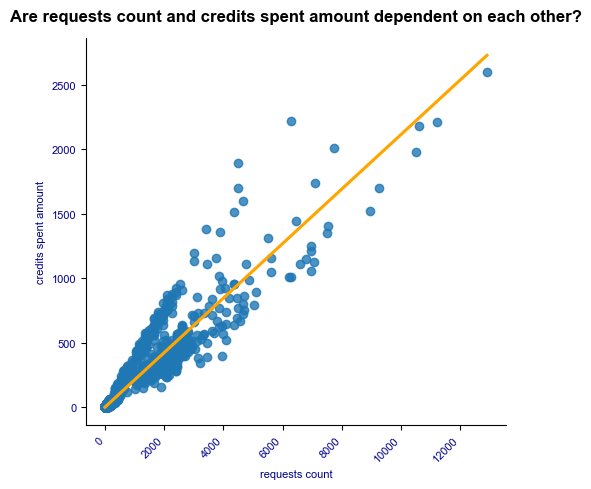

In [24]:
myplt.linear_regression_plot("Are requests count and credits spent amount dependent on each other?", "requests count", "credits spent amount", "requests_cnt", "spent_amount", None, None)

Quick Conclusions:

The number of requests predicts credit usage very well, but it is less accurate for very high volumes. But it is true that requests count and credits spent amount are dependent on each other. There is a reason of that behavior:

With a small number of requests (e.g. 10) cost differences are also small. With a large number (e.g. 10 000) these small differences accumulate creating a large variance.